In [2]:
# from google.colab import files
# files.upload()

In [3]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !kaggle datasets download leadbest/googlenewsvectorsnegative300

In [5]:
# !unzip -q googlenewsvectorsnegative300.zip

In [9]:
import gensim
from gensim.models import Word2Vec,KeyedVectors

In [10]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True,
                                          limit=500000)

In [11]:
model['man']

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [12]:
model['man'].shape

(300,)

In [13]:
model['glass']

array([-0.22363281,  0.12402344, -0.09130859,  0.03808594,  0.04833984,
        0.25390625,  0.4296875 , -0.15039062,  0.28515625,  0.49023438,
       -0.20507812, -0.30664062,  0.11669922, -0.29882812, -0.13476562,
       -0.09570312, -0.12109375, -0.08105469,  0.02380371, -0.07421875,
        0.15722656,  0.04614258,  0.12695312, -0.08300781, -0.140625  ,
        0.29882812,  0.05688477,  0.24121094, -0.07763672, -0.03015137,
       -0.09960938, -0.08203125, -0.08837891, -0.07177734,  0.11621094,
       -0.14355469, -0.08837891,  0.203125  , -0.17382812,  0.10595703,
        0.01953125,  0.0145874 ,  0.10839844, -0.1484375 ,  0.13183594,
        0.0534668 , -0.10546875, -0.07861328,  0.046875  , -0.06494141,
       -0.11230469,  0.18261719, -0.10107422, -0.06542969, -0.14550781,
        0.05004883,  0.03759766,  0.10351562, -0.02526855, -0.07958984,
       -0.22753906, -0.07861328, -0.09570312, -0.3125    , -0.16699219,
        0.09326172,  0.17089844, -0.21972656,  0.10888672,  0.12

In [14]:
model.most_similar('man')

[('woman', 0.7664012908935547),
 ('boy', 0.6824871301651001),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409832954407),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116),
 ('guy', 0.5420035123825073)]

In [15]:
model.most_similar('cricket')

[('cricketing', 0.8372225761413574),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094819188117981),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624265551567078),
 ('Cricket', 0.75413978099823),
 ('cricketer', 0.7372578382492065),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614186286926),
 ('West_Indies_cricket', 0.6987985968589783)]

In [16]:
model.most_similar('facebook')

[('Facebook', 0.7563533186912537),
 ('FaceBook', 0.7076998949050903),
 ('twitter', 0.6988552212715149),
 ('myspace', 0.6941817998886108),
 ('Twitter', 0.664244532585144),
 ('Facebook.com', 0.6529868245124817),
 ('FacebookFacebook', 0.6162722110748291),
 ('facebook.com', 0.6135972142219543),
 ('Twitter.com', 0.6102108359336853),
 ('TwitterTwitter', 0.6085205674171448)]

In [19]:
model.most_similar('woman')

[('man', 0.7664012908935547),
 ('girl', 0.7494640946388245),
 ('teenage_girl', 0.7336829304695129),
 ('teenager', 0.6317085027694702),
 ('lady', 0.6288785934448242),
 ('teenaged_girl', 0.6141784191131592),
 ('mother', 0.6076306104660034),
 ('policewoman', 0.6069462299346924),
 ('boy', 0.5975907444953918),
 ('Woman', 0.5770983099937439)]

In [20]:
model.similarity('man', 'woman')

0.76640123

In [22]:
model.doesnt_match(['JAVA', 'C', 'EGG'])

'EGG'

In [23]:
vec = model['king'] - model['man'] + model['woman']
model.most_similar(vec)

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('queens', 0.5289887189865112),
 ('ruler', 0.5247419476509094)]

In [24]:
model['king'].shape

(300,)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

words = ['king', 'queen', 'woman', 'girl', 'boy', 'man', 'water']

embedding = np.array(
    [model['king'][:20],
    model['queen'][:20],
    model['woman'][:20],
    model['girl'][:20],
    model['boy'][:20],
    model['man'][:20],
    model['water'][:20]]
    )

df = pd.DataFrame(embedding, index=words)

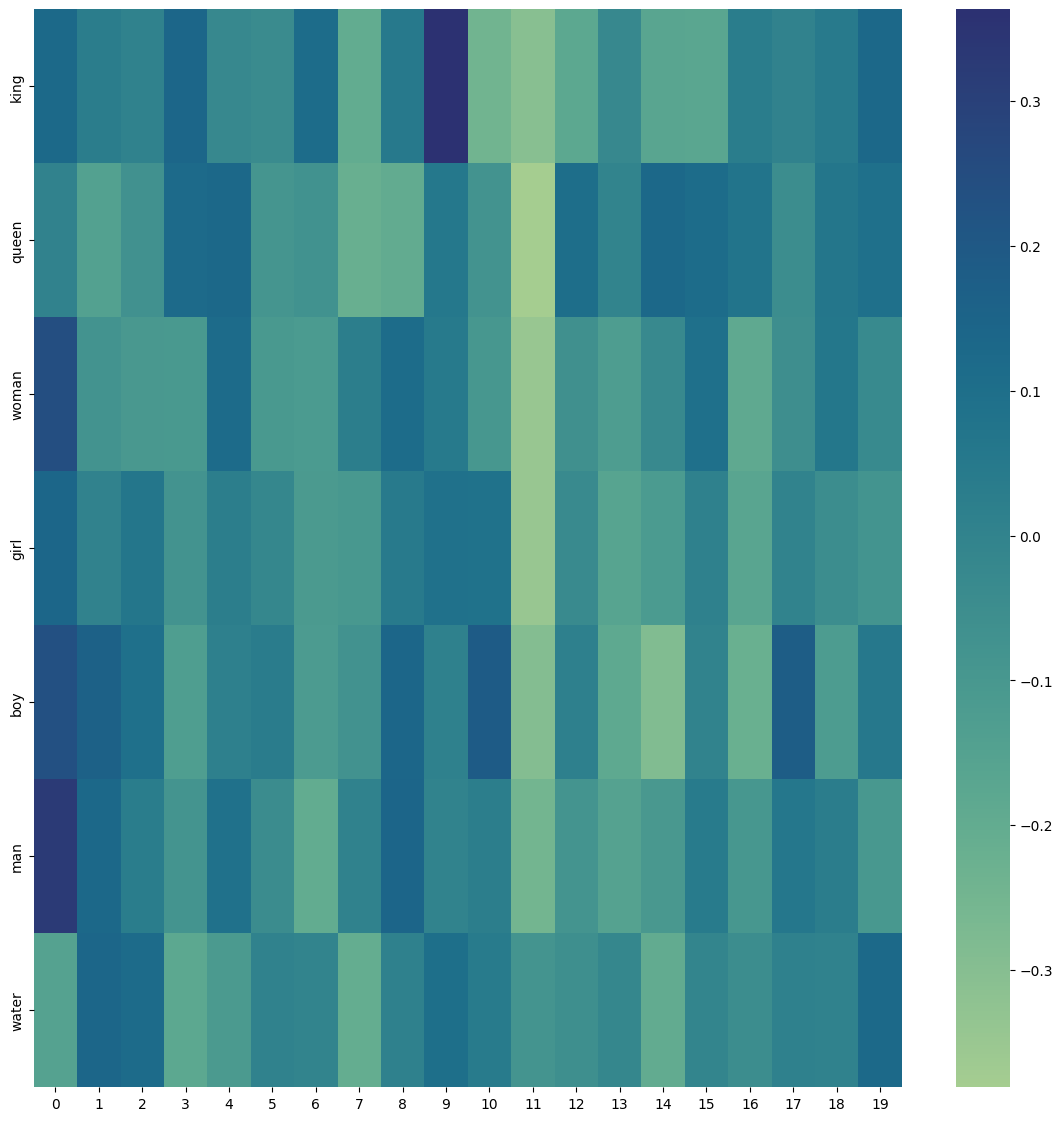

In [32]:
plt.figure(figsize=(14,14))
sns.heatmap(df, cmap='crest')
plt.show()